In [1]:
######################################################
#       Stock Technical Analysis with Python         #
#            Rate of Change ROC(21)                  #
#                                                    #
######################################################

In [31]:
# Packages Importing
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import talib as ta

from tqdm import tqdm_notebook
from datetime import *

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 4.29 ms


In [32]:
# Data Reading
index_data = pd.read_csv("/home/gordon/work/project_models/iicapstone/data/hist/index_hist_lst_10y_1mo.csv", index_col='Date', parse_dates=True)
index_data.columns = ['dow','sp500','nasdaq']
index_data.head()

,dow,sp500,nasdaq
Date,,,
2010-12-01,11577.509766,1257.640015,2652.870117
2011-01-01,11891.929688,1286.119995,2700.080078
2011-02-01,12226.339844,1327.219971,2782.270020
2011-03-01,12319.730469,1325.829956,2781.070068
2011-04-01,12810.540039,1363.609985,2873.540039


time: 18.2 ms


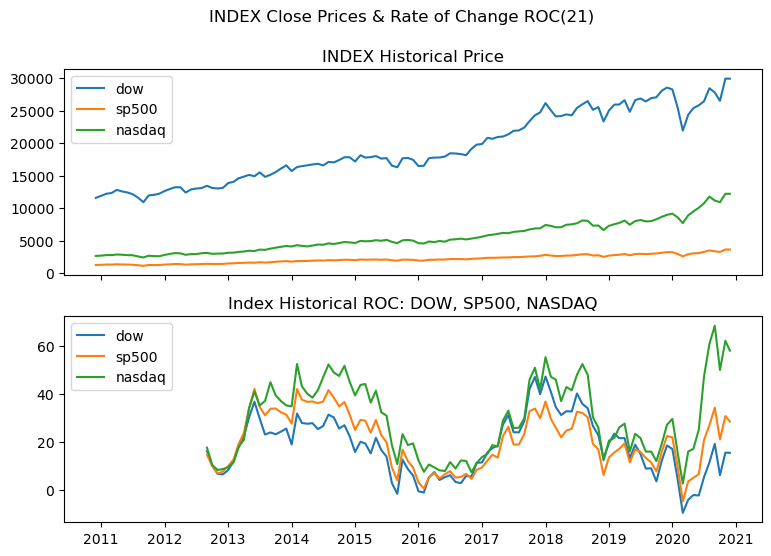

time: 617 ms


In [33]:
# Rate of Change ROC(21) Calculation and Chart

# Technical Indicator Calculation
index_data['rocDOW'] = ta.ROC(np.asarray(index_data['dow']), timeperiod=21)
index_data['rocSP500'] = ta.ROC(np.asarray(index_data['sp500']), timeperiod=21)
index_data['rocNASDAQ'] = ta.ROC(np.asarray(index_data['nasdaq']), timeperiod=21)

# Technical Indicator Chart
fig1, ax = plt.subplots(2, sharex=True, figsize = (9,6), dpi = 100)

ax[0].plot(index_data[['dow','sp500','nasdaq']])
ax[0].legend(index_data.columns, loc='upper left')
ax[0].set_title('INDEX Historical Price')

ax[1].plot(index_data[['rocDOW','rocSP500','rocNASDAQ']])
ax[1].legend(index_data.columns, loc='upper left')
ax[1].set_title('Index Historical ROC: DOW, SP500, NASDAQ')

plt.suptitle('INDEX Close Prices & Rate of Change ROC(21)');

No handles with labels found to put in legend.


,dow,sp500,nasdaq,rocDOW,rocSP500,rocNASDAQ,rocDOW(-1),rocSP500(-1),rocNASDAQ(-1),rocDOW(-2),rocSP500(-2),rocNASDAQ(-2),rocsigDOW
Date,,,,,,,,,,,,,
2010-12-01,11577.509766,1257.640015,2652.870117,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0
2011-01-01,11891.929688,1286.119995,2700.080078,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0
2011-02-01,12226.339844,1327.219971,2782.270020,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0
2011-03-01,12319.730469,1325.829956,2781.070068,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0
2011-04-01,12810.540039,1363.609985,2873.540039,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0


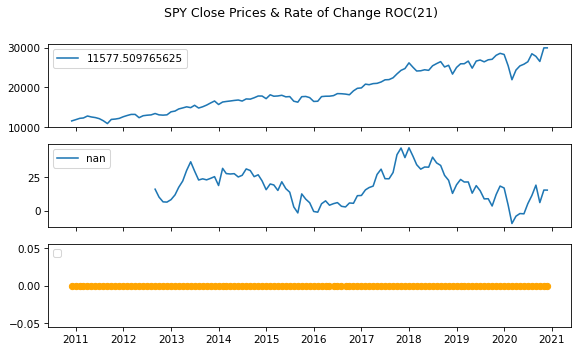

time: 848 ms


In [34]:
# 3. Bands Crossover Trading Signals

# Previous Periods Data (avoid backtesting bias)
index_data['rocDOW(-1)'] = index_data['rocDOW'].shift(1)
index_data['rocSP500(-1)'] = index_data['rocSP500'].shift(1)
index_data['rocNASDAQ(-1)'] = index_data['rocNASDAQ'].shift(1)

index_data['rocDOW(-2)'] = index_data['rocDOW'].shift(2)
index_data['rocSP500(-2)'] = index_data['rocDOW'].shift(2)
index_data['rocNASDAQ(-2)'] = index_data['rocDOW'].shift(2)
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)

index_data['rocsigDOW'] = 0
rocsig = 0

for i, r in enumerate(index_data.iterrows()):
    if r[1]['rocDOW(-2)'] < -10 and r[1]['rocDOW(-1)'] > -10:
        rocsig = 1
    elif r[1]['rocDOW(-2)'] < 10 and r[1]['rocDOW(-1)'] > 10:
        rocsig = -1
    else:
        rocsig = 0
    index_data.iloc[i, 9] = rocsig

# Trading Signals Chart
fig2, ax = plt.subplots(3, sharex=True, figsize = (9,5), dpi = 75)

ax[0].plot(index_data['dow'])
ax[0].legend(index_data['dow'], loc='upper left')
ax[1].plot(index_data['rocDOW'])
ax[1].legend(index_data['rocDOW'], loc='upper left')
ax[2].plot(index_data['rocsigDOW'], marker='o', linestyle='', color='orange')
ax[2].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Rate of Change ROC(21)');

index_data.head()

## Bands Crossover Trading Strategy
### Generate Trading Strategy (own stock=1 , not own stock=0, short-selling not available)

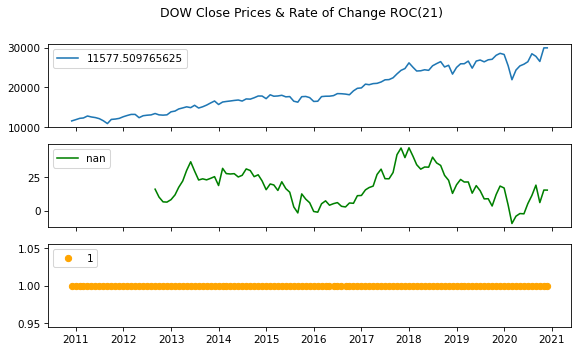

time: 1.08 s


In [39]:
index_data['rocstrDOW'] = 1
rocstr = 0
for i, r in enumerate(index_data.iterrows()):
    if r[1]['rocsigDOW'] == 1:
        rocstr = 1
    elif r[1]['rocsigDOW'] == -1:
        rocstr = 0
    else:
        rocstr = index_data['rocstrDOW'][i-1]
    index_data.iloc[i, 10] = rocstr

# Trading Strategy Chart
fig3, ax = plt.subplots(3, sharex=True, figsize = (9,5), dpi = 75)
ax[0].plot(index_data['dow'])
ax[0].legend(index_data['dow'], loc='upper left')
ax[1].plot(index_data['rocDOW'], color='green')
ax[1].legend(index_data['rocDOW'], loc='upper left')
ax[2].plot(index_data['rocstrDOW'], marker='o', linestyle='', color='orange')
ax[2].legend(index_data['rocstrDOW'], loc='upper left')
plt.suptitle('DOW Close Prices & Rate of Change ROC(21)')
plt.show()

# Bands Crossover Strategy Performance Comparison

## Strategies Daily Returns
### Price Crossover Strategy Without Trading Commissions

In [27]:
index_data['rocdrtDOW'] = ((index_data['dow']/index_data['dow'].shift(1))-1)*index_data['rocstrDOW']
spy.iloc[0, 11] = 0

# Price Crossover Strategy With Trading Commissions (1% Per Trade)
spy['rocstrDOW(-1)'] = spy['rocstrDOW'].shift(1)
spy['roctcDOW'] = spy['rocsigDOW']
roctc = 0

for i, r in enumerate(index_data.iterrows()):
    if (r[1]['rocsigDOW'] == 1 or r[1]['rocsigDOW'] == -1) and r[1]['rocstrDOW'] != r[1]['rocstrDOW(-1)']:
        roctc = 0.01
    else:
        roctc = 0.00
    index_data.iloc[i, 13] = roctc

index_data['rocdrtcDOW'] = (((index_data['dow']/index_data['dow'].shift(1))-1)-index_data['roctcDOW'])*index_data['rocstrDOW']
index_data.iloc[0, 14] = 0

# Buy and Hold Strategy
index_data['bhdrtDOW'] = (index_data['dow']/index_data['dow'].shift(1))-1
index_data.iloc[0, 15] = 0

KeyError: 'rocstrDOW'

### Strategies Cumulative Returns

In [ ]:
# Cumulative Returns Calculation
spy['roccrt'] = np.cumprod(spy['rocdrt']+1)-1
spy['roccrtc'] = np.cumprod(spy['rocdrtc']+1)-1
spy['bhcrt'] = np.cumprod(spy['bhdrt']+1)-1
# Cumulative Returns Chart
spy.plot(y=['roccrt', 'roccrtc', 'bhcrt'])
plt.title('Rate of Change ROC(21) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

### Strategies Performance Metrics

In [ ]:
# Annualized Returns
rocyrt = spy.iloc[251, 16]
rocyrtc = spy.iloc[251, 17]
bhyrt = spy.iloc[251, 18]
# Annualized Standard Deviation
rocstd = np.std(spy['rocdrt'])*np.sqrt(252)
rocstdc = np.std(spy['rocdrtc'])*np.sqrt(252)
bhstd = np.std(spy['bhdrt'])*np.sqrt(252)
# Annualized Sharpe Ratio
rocsr = rocyrt/rocstd
rocsrc = rocyrtc/rocstdc
bhsr = bhyrt/bhstd
# Summary Results Data Table
data = [{'0': '', '1': 'ROC(21)', '2': 'ROC(21)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': rocyrt, '2': rocyrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': rocstd, '2': rocstdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': rocsr, '2': rocsrc, '3': bhsr}]

In [10]:
table = pd.DataFrame(data)
print(spy)
print(table)

NameError: name 'spy' is not defined